In [1]:
# Load data ke dalam data frame 
import pandas as pd

# spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('allreview_clean_new.csv', encoding='latin-1') 

df.head()

,review_tokens_stemmed,sentimen,classified_text,tweet_text,sentence_score,max_positive,max_negative,kelas
0,coba tipe kulit minyak,"{'classified_text': 'coba tipe kulit minyak', ...",coba tipe kulit minyak,coba tipe kulit minyak,['coba tipe kulit minyak'],1,-1,netral
1,pes tanggal tanggal banget,{'classified_text': 'pes tanggal tanggal bange...,pes tanggal tanggal banget,pes tanggal tanggal banget,['pes tanggal tanggal banget'],1,-1,netral
2,moga cocok coba cleansing oil merk,{'classified_text': 'moga cocok [3] coba clean...,moga cocok [3] coba cleansing oil merk,moga cocok coba cleansing oil merk,['moga cocok [3] coba cleansing oil merk'],3,-1,positif
3,efek,"{'classified_text': 'efek', 'tweet_text': ' ef...",efek,efek,['efek'],1,-1,netral
4,wow best buy pakai up kalo coba somethinc cush...,{'classified_text': 'wow [4] best buy pakai up...,wow [4] best buy pakai up kalo coba somethinc ...,wow best buy pakai up kalo coba somethinc cus...,['wow [4] best buy pakai up kalo coba somethin...,4,-1,positif


In [2]:
# Drop 3 kolom terakhir yang tidak digunakan dengan fungsi iloc
df = df.drop(df.iloc[:,1:7], axis=1)

# Cek data teratas
df.head()

,review_tokens_stemmed,kelas
0,coba tipe kulit minyak,netral
1,pes tanggal tanggal banget,netral
2,moga cocok coba cleansing oil merk,positif
3,efek,netral
4,wow best buy pakai up kalo coba somethinc cush...,positif


In [3]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'review_tokens_stemmed' : 'Review',
    'kelas' : 'Sentiment'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# Cek data teratas
df.head()

,Review,Sentiment
0,coba tipe kulit minyak,netral
1,pes tanggal tanggal banget,netral
2,moga cocok coba cleansing oil merk,positif
3,efek,netral
4,wow best buy pakai up kalo coba somethinc cush...,positif


In [4]:
# Cek jumlah data per kelas
print(df['Sentiment'].value_counts())
print('\n')

# Cek kelengkapan data
print(df.info())
print('\n')

# Cek statistik deskriptif
print(df.describe())

positif    1129
netral      658
negatif     541
Name: Sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2328 non-null   object
 1   Sentiment  2328 non-null   object
dtypes: object(2)
memory usage: 36.5+ KB
None


                 Review Sentiment
count              2328      2328
unique             2164         3
top     coba moga cocok   positif
freq                 16      1129


In [5]:
# Data untuk label
new_labels = {
    'negatif' : 0,
    'netral' : 1,
    'positif' : 2
}

# Encode label (mengubah label dari spam dan ham menjadi 1 dan 0)
df['Sentiment'] = df['Sentiment'].map(new_labels)

# Cek data teratas
df.head()

,Review,Sentiment
0,coba tipe kulit minyak,1
1,pes tanggal tanggal banget,1
2,moga cocok coba cleansing oil merk,2
3,efek,1
4,wow best buy pakai up kalo coba somethinc cush...,2


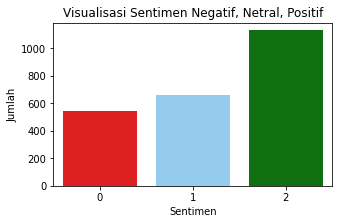

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualisasi sentimen positif, netral, dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sentiment', palette={0: 'red', 1: 'lightskyblue', 2: 'green'})
plt.title('Visualisasi Sentimen Negatif, Netral, Positif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [7]:
# Memisahkan fitur dengan label
X = df['Review'].values
y = df['Sentiment'].values

In [8]:
# Ekstraksi fitur
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# mnb = MultinomialNB()

# # Membuat objek StratifiedKFold untuk 10-fold cross-validation
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Inisialisasi list untuk menyimpan skor validasi silang
# scores = []

# # Loop melalui setiap lipatan (fold) dalam cross-validation
# for train_index, test_index in skf.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]  # Data latih dan uji
#     y_train, y_test = y[train_index], y[test_index]  # Label data latih dan uji

#     # Inisiasi TfidfVectorizer
#     bow = TfidfVectorizer(max_features=510)

#     # Fitting dan transform X_train dengan CountVectorizer
#     X_train = bow.fit_transform(X_train)

#     # Transform X_test
#     # X_test hanya transform (bukan fit_transform) karena agar model tidak mengetahui parameter yang 
#     # digunakan oleh CountVectorizer untuk fitting data X_test
#     # sehingga data testing tetap menjadi data yang asing bagi model
#     X_test = bow.transform(X_test)

#     # Melatih model klasifikasi pada data latih yang sudah diresampling
#     mnb.fit(X_train, y_train)

#     # Evaluasi model pada data uji
#     score = mnb.score(X_test, y_test)
#     scores.append(score)

# # Menampilkan skor validasi silang rata-rata
# print("Average cross-validation score:", np.mean(scores))

# Inisialisasi model
mnb = MultinomialNB()

# Membuat objek StratifiedKFold untuk 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi TfidfVectorizer
bow = TfidfVectorizer(max_features=510)


# List untuk menyimpan prediksi dan label sebenarnya dari setiap lipatan
all_predictions = []
all_true_labels = []

# Loop melalui setiap lipatan (fold) dalam cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]  # Data latih dan uji
    y_train, y_test = y[train_index], y[test_index]  # Label data latih dan uji

    # Transformasi seluruh data menggunakan TfidfVectorizer
    X_train_transform = bow.fit_transform(X_train)
    X_test_transform = bow.transform(X_test)

    # Melatih model klasifikasi pada data latih
    mnb.fit(X_train_transform, y_train)

    # Membuat prediksi pada data uji
    predictions = mnb.predict(X_test_transform)

    # Menambahkan prediksi dan label sebenarnya ke dalam list
    all_predictions.extend(predictions)
    all_true_labels.extend(y_test)

In [9]:
# Hitung metrik evaluasi
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

# Print hasil
print("Overall accuracy:", accuracy)
print("Overall precision:", precision)
print("Overall recall:", recall)
print("Overall F1-score:", f1)

print(f'Confusion Matrix : \n {confusion_matrix(all_true_labels, all_predictions)}')
print('-----------------------------------------------------\n')
print(classification_report(all_true_labels, all_predictions, zero_division=0))

Overall accuracy: 0.7319587628865979
Overall precision: 0.7215295258996314
Overall recall: 0.7319587628865979
Overall F1-score: 0.7094932154177781
Confusion Matrix : 
 [[ 353  118   70]
 [  95  255  308]
 [   7   26 1096]]
-----------------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       541
           1       0.64      0.39      0.48       658
           2       0.74      0.97      0.84      1129

    accuracy                           0.73      2328
   macro avg       0.72      0.67      0.68      2328
weighted avg       0.72      0.73      0.71      2328



In [11]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = bow.transform([new_text])
predicted_sentimen = mnb.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentiment_label = "negatif"
elif predicted_sentimen[0] == 1:
    sentiment_label = "netral"
elif predicted_sentimen[0] == 2:
    sentiment_label = "positif"

print("Hasil Analisis Sentimen untuk Teks Baru : ", sentiment_label)

Hasil Analisis Sentimen untuk Teks Baru :  netral
